In [1]:
from random import gauss
import matplotlib.pyplot as plt
import numpy as np
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")

# GARCH(1,1) Model

$$
a_t = \varepsilon_t \sqrt{\omega + \alpha_1 a_{t-1}^2 + \beta_1 \sigma_{t-1}^2}
$$

$$
a_0, a_1 \sim \mathcal{N}(0,1)
$$

$$
\sigma_0 =1, \sigma_1 = 1
$$

$$
\varepsilon_t \sim \mathcal{N}(0,1)
$$

In [2]:
# create dataset
n = 1000
omega = 0.5

alpha_1 = 0.1

beta_1 = 0.3

test_size = int(n*0.1)

series = [gauss(0,1), gauss(0,1)]
vols = [1, 1]

for _ in range(n):
    new_vol = np.sqrt(omega + alpha_1*series[-1]**2 + beta_1*vols[-1]**2)
    new_val = gauss(0,1) * new_vol
    
    vols.append(new_vol)
    series.append(new_val)

Text(0.5, 1.0, 'Simulated GARCH(1,1) Data')

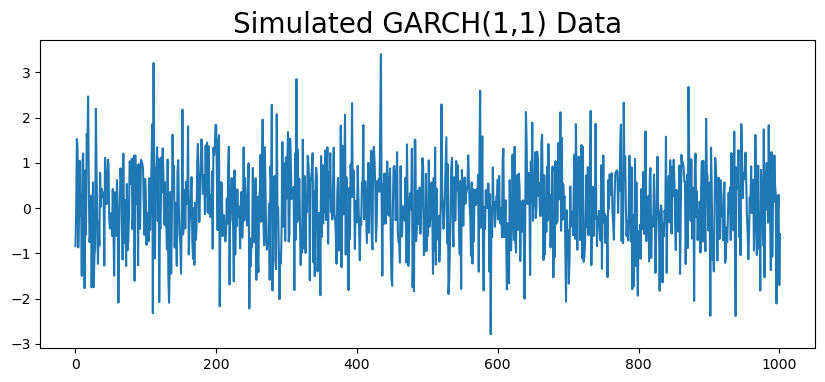

In [3]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.title('Simulated GARCH(1,1) Data', fontsize=20)

Text(0.5, 1.0, 'Data Volatility')

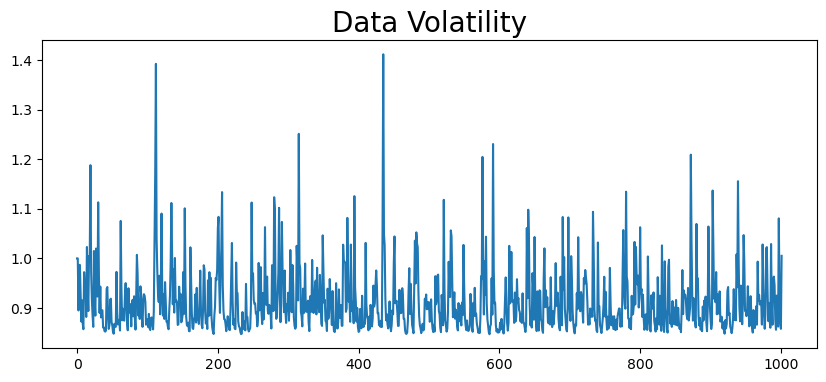

In [4]:
plt.figure(figsize=(10,4))
plt.plot(vols)
plt.title('Data Volatility', fontsize=20)

Text(0.5, 1.0, 'Data and Volatility')

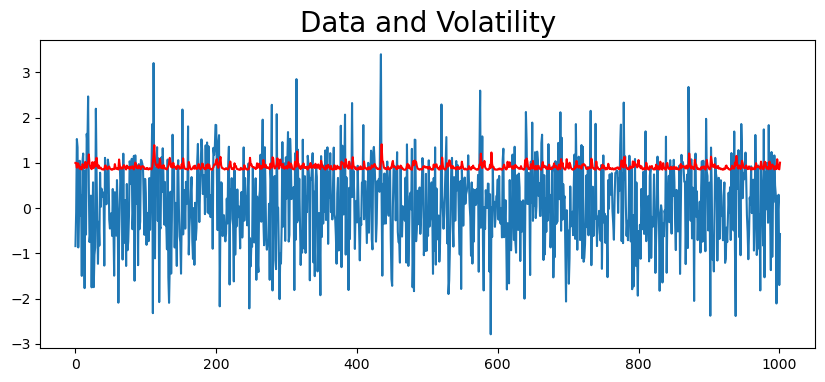

In [5]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.plot(vols, color='red')
plt.title('Data and Volatility', fontsize=20)

# PACF Plot

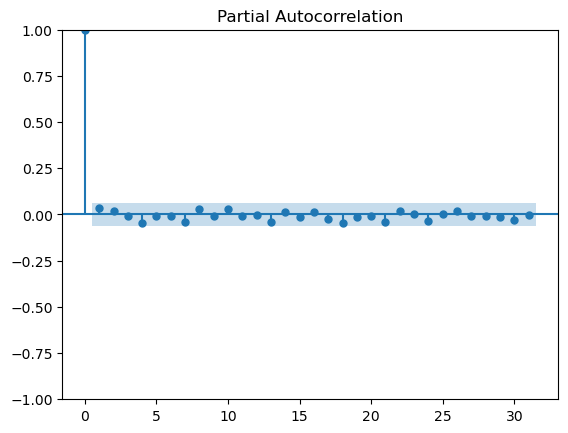

In [6]:
plot_pacf(np.array(series)**2)
plt.show()

# Fit the GARCH Model

In [7]:
train, test = series[:-test_size], series[-test_size:]

In [8]:
model = arch_model(train, p=1, q=1)

In [9]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2065.142835980914
Iteration:      2,   Func. Count:     14,   Neg. LLF: 1237.9181329409967
Iteration:      3,   Func. Count:     21,   Neg. LLF: 1210.6694784517954
Iteration:      4,   Func. Count:     27,   Neg. LLF: 1210.3247447633885
Iteration:      5,   Func. Count:     33,   Neg. LLF: 1212.5220037702948
Iteration:      6,   Func. Count:     39,   Neg. LLF: 1209.4238569048014
Iteration:      7,   Func. Count:     44,   Neg. LLF: 1209.4237817930227
Iteration:      8,   Func. Count:     49,   Neg. LLF: 1209.4237749320437
Iteration:      9,   Func. Count:     53,   Neg. LLF: 1209.423774932171
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1209.4237749320437
            Iterations: 9
            Function evaluations: 53
            Gradient evaluations: 9


In [10]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1209.42
Distribution:                  Normal   AIC:                           2426.85
Method:            Maximum Likelihood   BIC:                           2446.07
                                        No. Observations:                  902
Date:                Wed, Nov 30 2022   Df Residuals:                      901
Time:                        20:28:09   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0621  3.064e-02      2.026  4.272e-02 [2.038e-03,  0.122]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.5865      0.147      3.987  6.688e-05    [  0.298,  0.875]
alpha[1]       0.0577  5.164e-02      1.117      0.264 [-4.351e-02,  0.159]
beta[1]        0.2587      0.174      1.485      0.138 [-8.281e-02,  0.600]
===========================================================================

Covariance estimator: robust
"""

# Predict

In [11]:
predictions = model_fit.forecast(horizon=test_size)

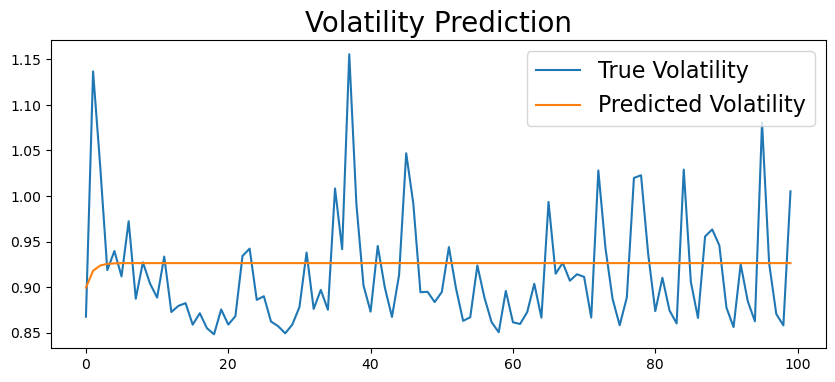

In [12]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

# Rolling Forecast Origin

In [14]:
rolling_predictions = []
for i in range(test_size):
    train = series[:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

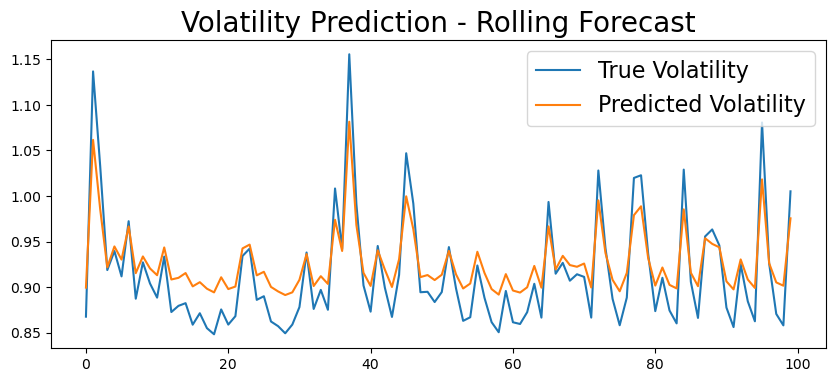

In [15]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)